# Test code used to run age classification

In [1]:
from datetime import datetime
from pathlib import Path
from aging.size_norm.validation import transform_data, age_classifiers, plot_classification, link_results_folder
from aging.organization.paths import ValidationPaths

In [2]:
# model_folder = Path(
#     "/n/groups/datta/win/longtogeny/size_norm/models/bottleneck_param_scan_00"
# )
# model_paths = sorted(model_folder.glob("**/model.pt"))
model_path = Path("/home/wg41/groups/win/longtogeny/size_norm/models/bottleneck_param_scan_00/stage_01/56e4e034-c98d-4e77-a79f-c742dd835d70/model.pt")
val_paths = ValidationPaths()

In [3]:
save_path = model_path.parent / "age_classification/transformed_age_classification_poses.p"

# import joblib
# data = joblib.load(save_path)

In [4]:
# transform_save_path = transform_data(val_paths.age_classifier, model_path)

In [5]:
%%time
# classifier_results = age_classifiers(transform_save_path)
classifier_results = age_classifiers(save_path, debug=True)

Loading data
Done loading data
Running pca
Done with pca
Running SVC gridsearch
Done with SVC gridsearch
Running RF gridsearch
Done with RF gridsearch
CPU times: user 3min 2s, sys: 48 s, total: 3min 50s
Wall time: 3min 58s


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


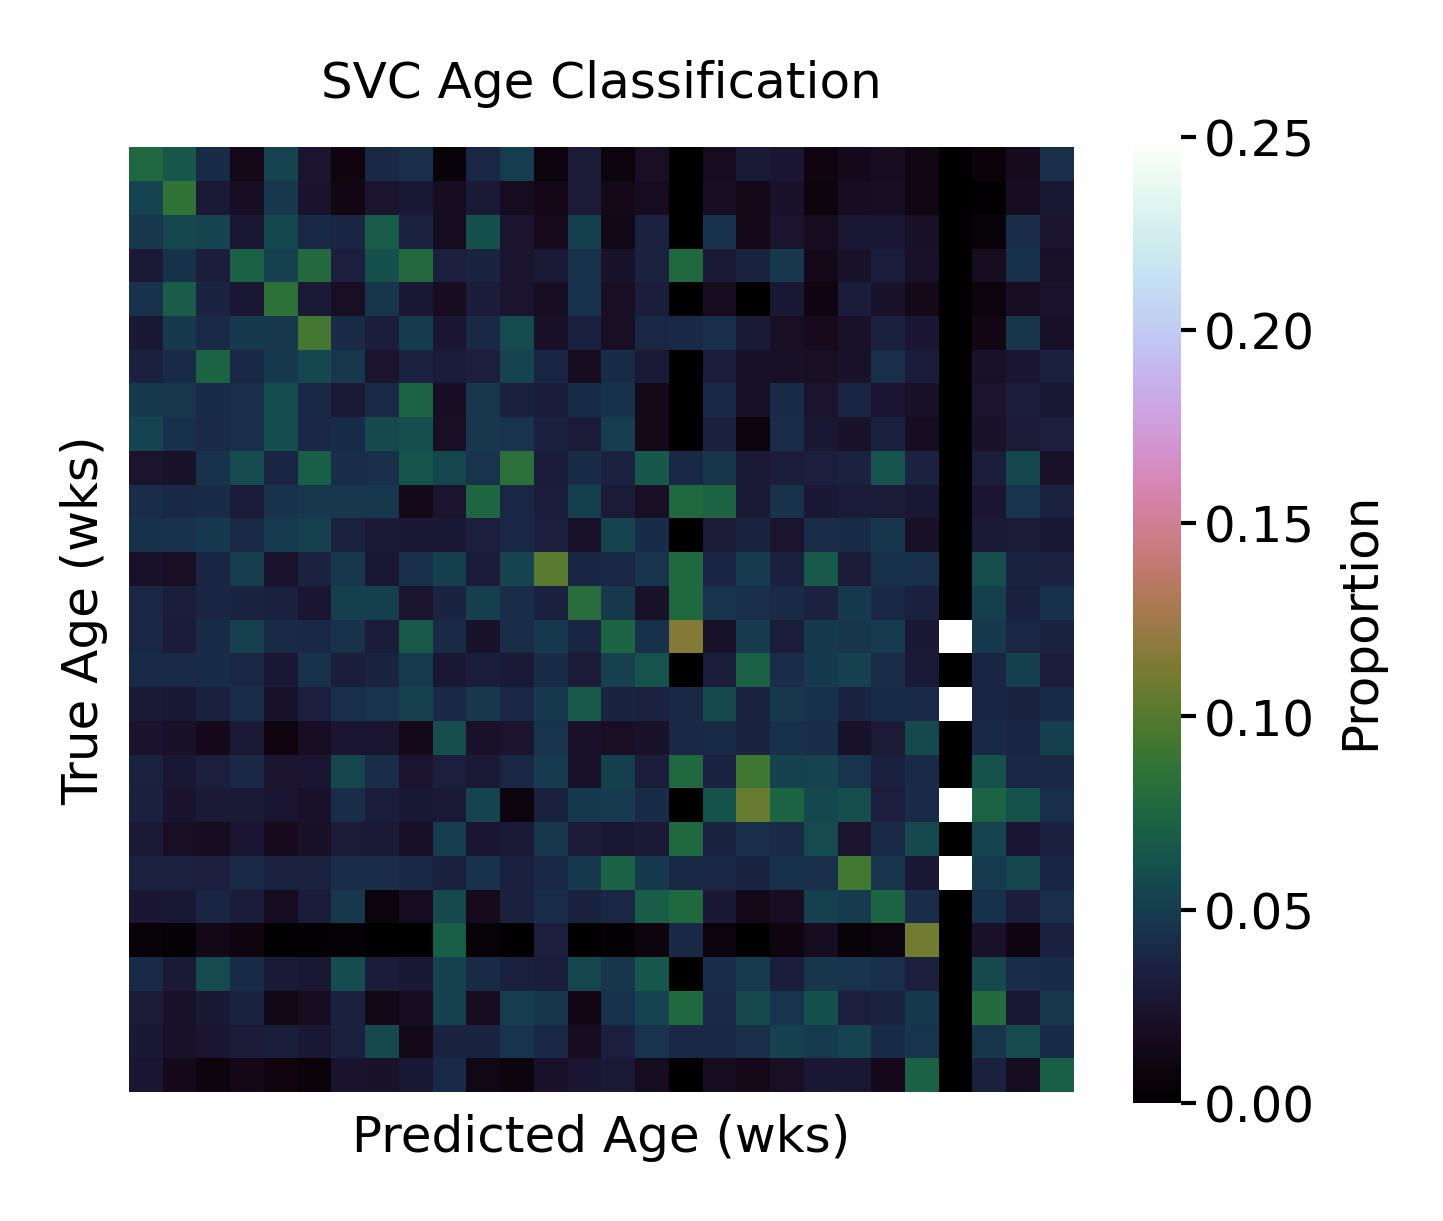

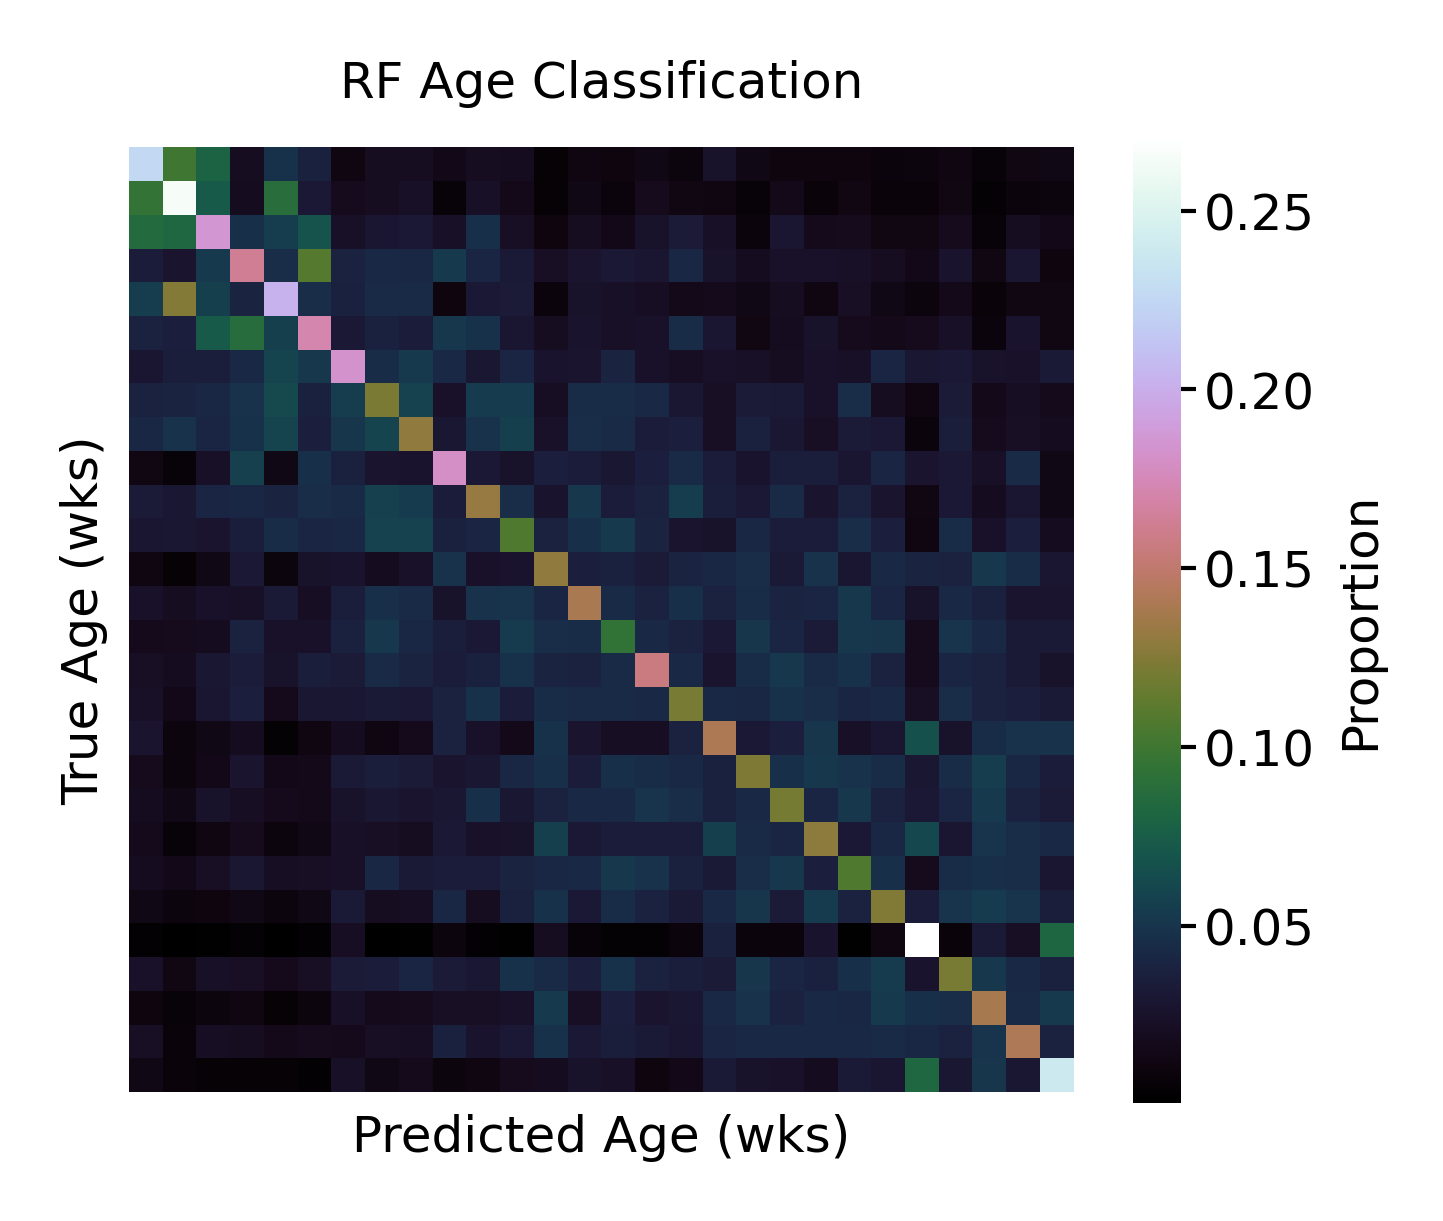

In [7]:
# make folder using date and time
out_folder = val_paths.classifier_pipeline / datetime.now().strftime(
    "%Y-%m-%d_%H-%M-%S"
)
plot_classification(classifier_results, out_folder)

In [8]:
link_results_folder(out_folder, model_path)

In [10]:
save_path.parents[1]

PosixPath('/home/wg41/groups/win/longtogeny/size_norm/models/bottleneck_param_scan_00/stage_01/56e4e034-c98d-4e77-a79f-c742dd835d70')